# Recognition of Handwritten digits from an image and converting it onto an editable document.

In [1]:
#import libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load the mnist dataset consisting of 60000 training and 10000 testing images of size 28*28
mnist = tf.keras.datasets.mnist 

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

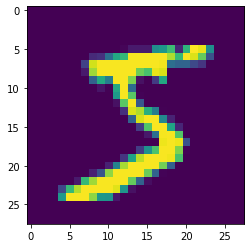

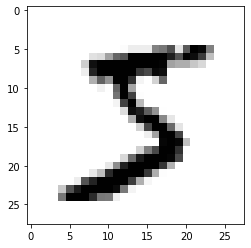

In [4]:
#display the first image
plt.imshow(x_train[0])
plt.show()
#showing it in binary form
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [5]:
# print(x_train[0]) # the background is black(0), the character is in white(255) , the above image displayed has been reverted

# Data preprocessing

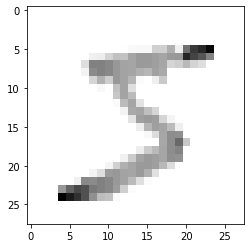

In [6]:
#Normalising the image, min-max normalization

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training Sample dimention",x_trainr.shape)
print("Testing sample dimention",x_testr.shape)


Training Sample dimention (60000, 28, 28, 1)
Testing sample dimention (10000, 28, 28, 1)


# Deep Neural network architecture

In [8]:
from tensorflow.keras.models import Sequential # network of different neural network layers connected in a sequential fashion
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D # different layers

In [9]:
model = Sequential()

#First Conv2D layer
model.add(Conv2D(64,(3,3),input_shape= x_trainr.shape[1:])) #64 filters or kernels or neurons
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second Conv2D layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third Conv2D layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#we have to flatten
model.add(Flatten())
model.add(Dense(64)) #first neural networks layer
model.add(Activation("relu"))

model.add(Dense(32)) #hidden layer
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax")) #gives class probabilities

#if the output is just one neuron, activation should be sigmoid




In [10]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [11]:
#compile the model with loss function, an optimizer and evaluation metrics
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [13]:
#Run the model for 10 epochs
model.fit(x_trainr,y_train,epochs=10,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 49s 1ms/sample - loss: 0.1011 - accuracy: 0.9690 - val_loss: 0.1001 - val_accuracy: 0.9694
Epoch 2/10
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0762 - val_accuracy: 0.9768
Epoch 3/10
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0690 - val_accuracy: 0.9791
Epoch 4/10
42000/42000 [==============================] - 49s 1ms/sample - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 5/10
42000/42000 [==============================] - 47s 1ms/sample - loss: 0.0403 - accuracy: 0.9875 - val_loss: 0.0616 - val_accuracy: 0.9811
Epoch 6/10
42000/42000 [==============================] - 48s 1ms/sample - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0596 - val_accuracy: 0.9841
Epoch 7/10
42000/42000 [==============================] 

# Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate(x_testr,y_test) #checking on 10,000 test samples
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 3s 266us/sample - loss: 0.0763 - accuracy: 0.9819
0.07633974309076003
0.9819


In [15]:
predictions = model.predict([x_testr])
#it will have class probabilities, so the class with highest probability will the actual class

In [16]:
#check for a random sample
print(np.argmax(predictions[2]))

1


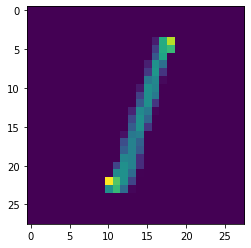

In [17]:
plt.imshow(x_test[2])

In [18]:
!pip install opencv-python

# Reading an image with more than 1 digits

In [20]:
import cv2
from imutils import contours

#This block of code is to extract indiviual character and save it as seperate image
    
image = cv2.imread('HCR_imgP/3.png')
image = cv2.bitwise_not(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts, _ = contours.sort_contours(cnts, method="left-to-right")

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 10:
        x,y,w,h = cv2.boundingRect(c)
        ROI =image[y:y+h, x:x+w]
        #add padding bits to the image
        cv2.imwrite('HCR_Img/HCR_{}.png'.format(ROI_number), cv2.copyMakeBorder( ROI, 100, 100, 100, 100, cv2.BORDER_CONSTANT))
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)
        ROI_number += 1


HCR_Img\HCR_0.png
HCR_Img\HCR_1.png
HCR_Img\HCR_2.png
HCR_Img\HCR_3.png
HCR_Img\HCR_4.png
[2, 5, 4, 6, 1]


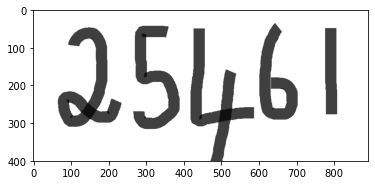

In [21]:
import glob

#read indiviual image and pass it through our model to get the correct prediction 

X_data = []
files = glob.glob ("HCR_Img/*.PNG")
for myFile in files:
    print(myFile)
    img = cv2.imread(myFile)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
    modified_img = tf.keras.utils.normalize(resized, axis = 1)
    modified_img = np.array(resized).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    prediction_img = model.predict(modified_img)
    prediction = np.argmax(prediction_img)
    X_data.append(prediction)

print(X_data)
img = cv2.imread("HCR_imgP/3.png") 
plt.imshow(img)


In [22]:
#Save the result to an editable document.

img_file = open("HCR_imgP/test.txt", "w")
for element in X_data:
    img_file.write(str(element))

img_file.close()